<h3>Part I: Basic Analysis</h3>

In [2]:
import pandas as pd
from pandas_datareader import data
from pandas.stats.api import ols 
import datetime as dt
import matplotlib.pyplot as pplot
import matplotlib as mp
import numpy as np
import re
import urllib.request as ur
from selenium import webdriver
from bs4 import BeautifulSoup
%matplotlib inline

name_te = ["AAPL","WIT","HPQ","SNDK","INTC","TSM","QCOM","TXN","MSFT","ORCL","SAP","XRX","EMC","SNE","ERIC","NOK"]
name_ba = ["RIO","VMC","GOLD","ACH","FCX","VALE","NUE","DOW","DD","SYT","MON","ECL","PKX","UFS","SWM","CLM"]
name_fin = ["HDB","WFC","BAC","HSBC","C","MTU","LFC","SAN","USB","TD","AIG","BCS","LYG","AXP","PUK","PNC"]
name_uti = ["NGG","NEE","DUK","D","SO","KEP","AEP","EXC","PCG","SRE","PPL","PEG","EIX","ED","XEL","WEC"]
name_comm = ["BT","AMZN","TWX","CHL","GOOGL","T","DIS","VZ","CSCO","CMCSA","VOD","TV","NTT","DCM","BIDU","PCLN"]
name_prdcsm = ["TM","WMT","HD","MCD","SBUX","LOW","HMC","F","GM","TGT","TJX","CUK","LVS","CCL","LUV","JCI"]
name_eng = ["XOM","CVX","PTR","TOT","BP","SLB","SNP","COP","E","OXY","HAL","EPD","STO","BHI","CAM","CEO"]
name_ind = ["GE","BA","UTX","HON","UNP","UPS","CNI","GD","RTN","NOC","EMR","NSC","PHG","DE","NJ","ERJ"]
name_noncyc = ["JNJ","BUD","PFE","KO","PEP","NVO","PM","UL","AMGN","SNY","BMY","MO","MA","BTI","CELG","AZN"]

start = dt.datetime(2010,11,18)
end = dt.datetime(2015,7,1)

data_frame_te = data.DataReader(name_te,'yahoo',start,end)
data_frame_ba = data.DataReader(name_ba,'yahoo',start,end)
data_frame_sp = data.DataReader(["^GSPC"],'yahoo',start,end)
data_frame_noncyc = data.DataReader(name_noncyc,'yahoo',start,end)
data_frame_comm = data.DataReader(name_comm,'yahoo',start,end)
data_frame_prdcsm = data.DataReader(name_prdcsm,'yahoo',start,end)
data_frame_eng = data.DataReader(name_eng,'yahoo',start,end)
data_frame_ind = data.DataReader(name_ind,'yahoo',start,end)
data_frame_fin = data.DataReader(name_fin,'yahoo',start,end)
data_frame_uti = data.DataReader(name_uti,'yahoo',start,end)


return_te = data_frame_te['Adj Close'].pct_change(30)[30:]
return_ba = data_frame_ba['Adj Close'].pct_change(30)[30:]
return_sp = data_frame_sp['Adj Close'].pct_change(30)[30:]
return_noncyc = data_frame_noncyc['Adj Close'].pct_change(30)[30:]
return_comm = data_frame_comm['Adj Close'].pct_change(30)[30:]
return_prdcsm = data_frame_prdcsm['Adj Close'].pct_change(30)[30:]
return_eng = data_frame_eng['Adj Close'].pct_change(30)[30:]
return_ind = data_frame_ind['Adj Close'].pct_change(30)[30:]
return_fin = data_frame_fin['Adj Close'].pct_change(30)[30:]
return_uti = data_frame_uti['Adj Close'].pct_change(30)[30:]



#Using BeautifulSoup to find the updated risk-free return rate
risk_free = list()
url = "http://finance.yahoo.com/market-overview/"
url_response=ur.urlopen(url)
data=BeautifulSoup(url_response)
for tag1 in data.find_all('div', class_='original'):
    for tag2 in tag1.find_all('tr'):
        raw = str(tag2.find_all('td',class_='yield Fw-400 neg-text-color align'))
        pattern = '\">(.*?)<'
        regex = re.compile(pattern)
        risk_free.extend(regex.findall(raw))
risk_free = eval(risk_free[5])/100
print("\nThe risk free rate is: ",risk_free)




The risk free rate is:  0.022000000000000002



The mean return of Technology stocks is:
 0.000545449214696
The standard deviation of Technology stocks is:
 0.024217723181
The beta of Technology stocks are:
 [ 0.93525314  1.2377619   1.74587012  1.79990675  1.0168048   0.95121646
  1.01745993  1.41805955  0.97813558  1.19172878  1.34998925  1.30429193
  1.39616929  1.77009187  1.24280547  1.52573042]
The mean of Technology beta is:
 1.30507970139

The mean return of Basic Materials stocks is:
 0.00021916907228
The standard deviation of Basic Materials stocks is:
 0.0191375537518
The beta of Basic Materials stocks are:
 [ 1.29871919  1.3463787  -0.04845634  1.10926808  1.44730161  0.98196734
  1.39584495  1.64938225  1.27619191  0.94926782  1.08326844  0.60470119
  1.00157606  1.36983992  0.41658095  0.96796716]
The mean of Basic Materials beta is:
 1.05311245185

The mean return of Communication stocks is:
 0.000742602396135
The standard deviation of Communication stocks is:
 0.0154455870097
The beta of Communication stocks are:
 [

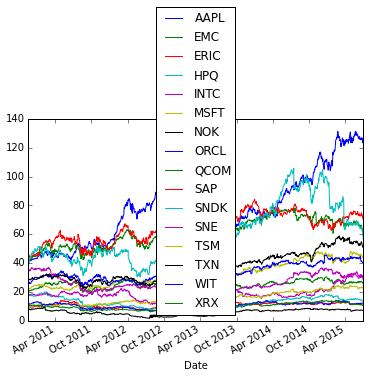

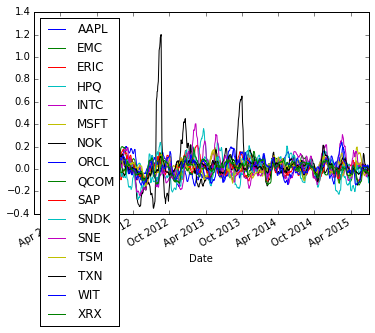

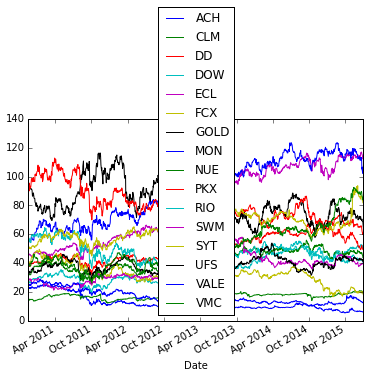

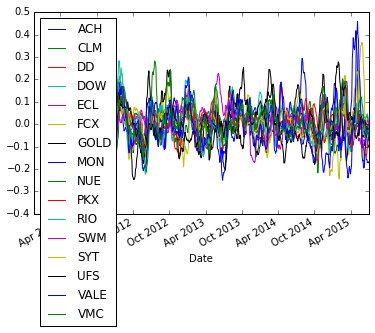

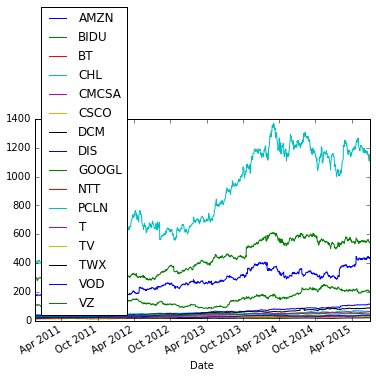

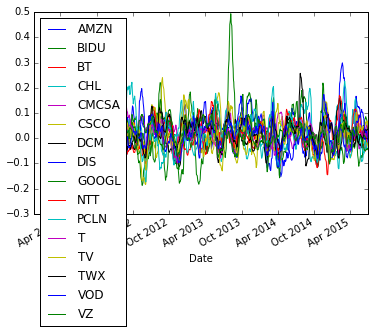

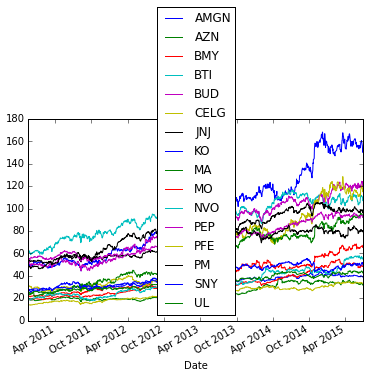

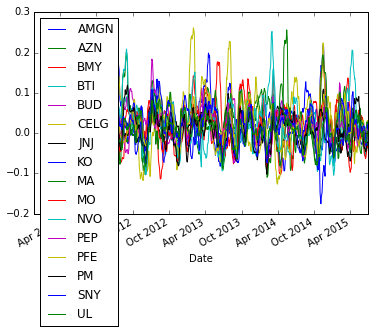

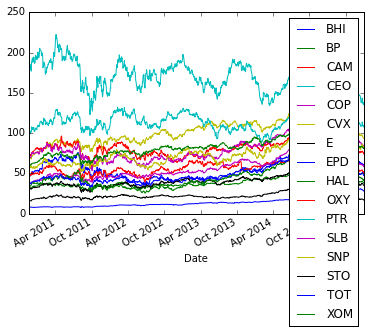

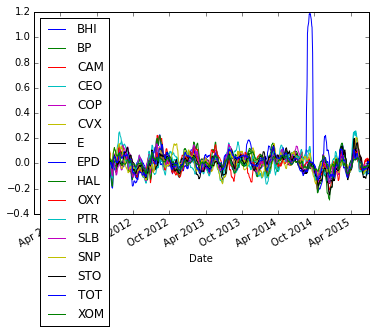

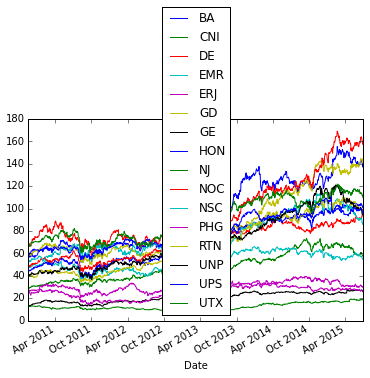

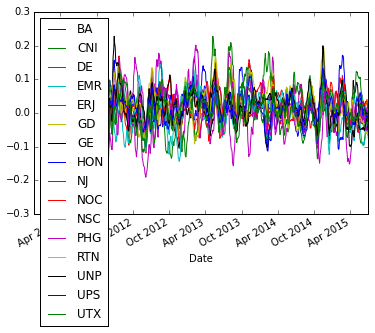

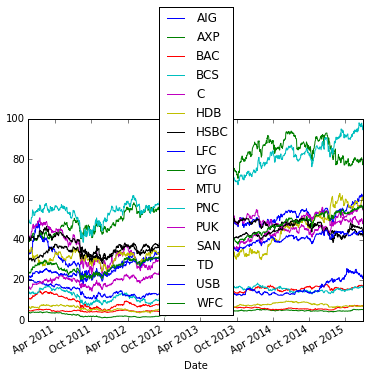

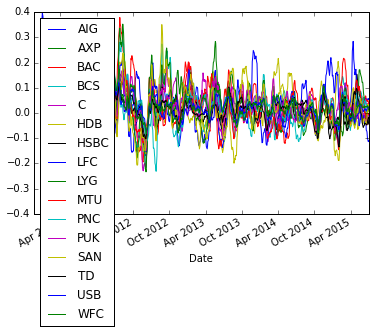

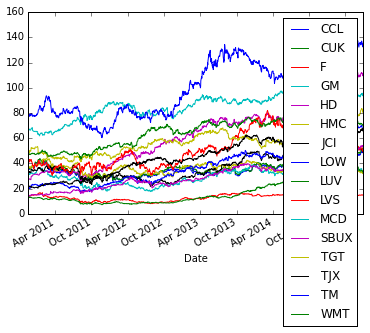

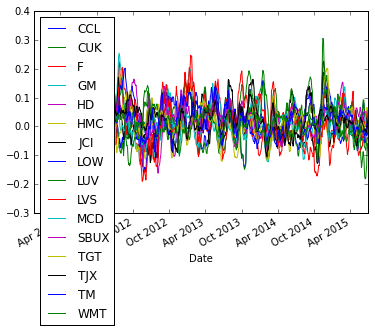

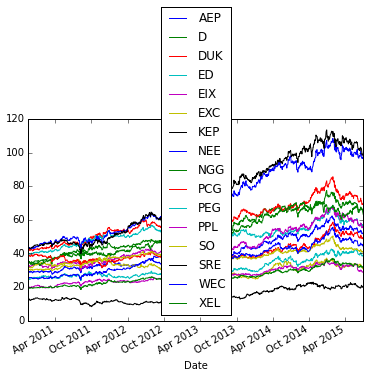

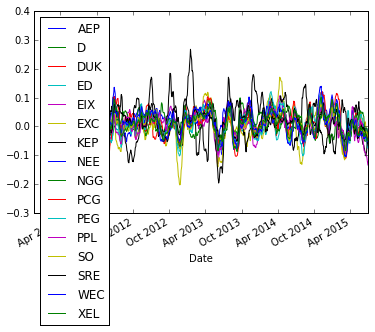

In [3]:
# Calculate the betas for different kinds of industries and prove that for periodic industries,
# They always have beta greater than 1 and non-periodic industries always have beta smaller than 1


beta_te = list()
beta_ba = list()
beta_comm = list()
beta_noncyc = list()
beta_eng = list()
beta_ind = list()
beta_fin = list()
beta_prdcsm = list()
beta_uti = list()
data_frame_list = [data_frame_te,data_frame_ba,data_frame_comm,data_frame_noncyc,data_frame_eng,data_frame_ind,data_frame_fin,data_frame_prdcsm,data_frame_uti]
beta_list = [beta_te,beta_ba,beta_comm,beta_noncyc,beta_eng,beta_ind,beta_fin,beta_prdcsm,beta_uti]
name_complete = ["Technology","Basic Materials","Communication","Nonperiodic Consumption","Energy","Industry","Finance","Periodic Consumption","Utilities"]
name_list = [name_te,name_ba,name_comm,name_noncyc,name_eng,name_ind,name_fin,name_prdcsm,name_uti]
return_list = [return_te,return_ba,return_comm,return_noncyc,return_eng,return_ind,return_fin,return_prdcsm,return_uti]
use_sp_return = np.array(return_sp['^GSPC'])
for i in range(9):
    close = np.array(data_frame_list[i]['Adj Close'])
    return_rate = close[1:]/close[:-1] - 1
    mean_return = np.mean(return_rate)
    std_return = np.std(return_rate)
    print("\nThe mean return of " + name_complete[i] + " stocks is:\n",mean_return)
    print("The standard deviation of " + name_complete[i] + " stocks is:\n",std_return)
    data_frame_list[i]['Adj Close'].plot()
    pplot.legend(loc = "best")
    pct_changes = data_frame_list[i]['Adj Close'].pct_change(21)
    ma_5 = pd.rolling_mean(pct_changes,5)
    ma_5.plot()
    for j in range(16):        
        use_stock_return = np.array(return_list[i][name_list[i][j]])
        cov = np.cov(use_sp_return,use_stock_return)
        beta = cov[1,0]/cov[0,0]
        beta_list[i] = np.append(beta_list[i],beta)
    print("The beta of " + name_complete[i] + " stocks are:\n",beta_list[i])
    print("The mean of " + name_complete[i] + " beta is:\n",np.mean(beta_list[i]))
  

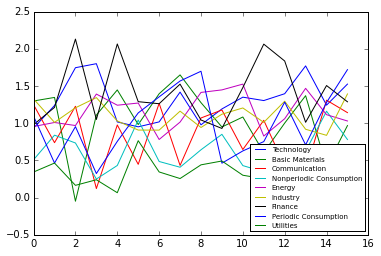

In [4]:
#Now do some ploting
x = range(16)
for i in range(9):
    pplot.plot(x,beta_list[i],label = name_complete[i])
    pplot.legend(loc = "lower right",prop={'size':7})



In [5]:
#calculate the mean alpha for every stock in every industry

mean_alpha_list = list()
#mean_sector_list = list()
# Now, let's calculate the alpha of different kinds of stocks
for i in range(9):
    mean_sector_alpha = list()
    for j in range(16):
        alpha = np.array(return_list[i][name_list[i][j]]) - risk_free - beta_list[i][j]*(np.array(return_sp['^GSPC']) - risk_free)     
        #print("\nThe alpha of " + name_list[i][j]+" is :\n",alpha)
        #print("\nThe mean alpha of " + name_list[i][j] + " is :\n",np.mean(alpha))
        mean_sector_alpha.append(np.mean(alpha))
    mean_alpha_list.append(mean_sector_alpha)
print(mean_alpha_list)

    
    
#x_alpha = range(len(return_te))   
    
#x=np.arange(0,len(alpha_apple))
#pplot.plot(x,alpha_apple)

[[0.018067364042114585, -0.0089822688248527953, -0.0062770595954022117, 0.0067458133807003521, 0.0030616777665641278, 0.0090784053429005807, -0.002165693421838223, 0.0068655000869224502, 0.0048700912532986468, 6.7805546898928805e-05, 0.0035855178341962662, -0.0084114699148122186, -0.0032386028888048376, -0.0049518712996032043, -0.005370911312462757, 0.0070116236305654955], [-0.016959176996074118, 0.012852645772018776, -0.019770509324418505, -0.018780152500428755, -0.02662606167889436, -0.045306269627032048, -0.0018198645585224514, 0.0093139802941056907, 0.0020377268875629686, 0.0015382525270320343, 0.0053854149021531419, 0.0079328249348092419, -0.028119510864138254, -0.0018074638747547708, -0.005883070868770557, -0.0028211073128754619], [0.017671134134570301, 0.011411092073839137, 0.020154546268271789, -0.0071702114656287457, 0.0042282539064503388, -0.0061335626310444645, 0.020012891592663482, -0.0028378766789818326, 0.0016947591105339016, 0.017999767525616786, 4.7405085106415944e-05, 

In [6]:
return_sp.to_csv("sp_return.csv")

In [7]:
# Part of Test the model: we have used 5 years' data to build our portfolio and now we use the recent 5 months' data to
# test our portfolio's performance



import pandas as pd
from pandas_datareader import data
from pandas.stats.api import ols 
import datetime as dt
import matplotlib.pyplot as pplot
import matplotlib as mp
import numpy as np
import re
import urllib.request as ur
from selenium import webdriver
from bs4 import BeautifulSoup
%matplotlib inline


start_test = dt.datetime(2015,7,1)
end_test = dt.datetime.today()
data_frame_nas_test = data.DataReader(["^GSPC"],'yahoo',start_test,end_test)
return_sp_test = data_frame_nas_test['Adj Close'].pct_change(30)[30:]
return_sp_test.to_csv("sp_return_test.csv")

name_te = ["AAPL","WIT","HPQ","SNDK","INTC","TSM","QCOM","TXN","MSFT","ORCL","SAP","XRX","EMC","SNE","ERIC","NOK"]
name_ba = ["RIO","VMC","GOLD","ACH","FCX","VALE","NUE","DOW","DD","SYT","MON","ECL","PKX","UFS","SWM","CLM"]
name_fin = ["HDB","WFC","BAC","HSBC","C","MTU","LFC","SAN","USB","TD","AIG","BCS","LYG","AXP","PUK","PNC"]
name_uti = ["NGG","NEE","DUK","D","SO","KEP","AEP","EXC","PCG","SRE","PPL","PEG","EIX","ED","XEL","WEC"]
name_comm = ["BT","AMZN","TWX","CHL","GOOGL","T","DIS","VZ","CSCO","CMCSA","VOD","TV","NTT","DCM","BIDU","PCLN"]
name_prdcsm = ["TM","WMT","HD","MCD","SBUX","LOW","HMC","F","GM","TGT","TJX","CUK","LVS","CCL","LUV","JCI"]
name_eng = ["XOM","CVX","PTR","TOT","BP","SLB","SNP","COP","E","OXY","HAL","EPD","STO","BHI","CAM","CEO"]
name_ind = ["GE","BA","UTX","HON","UNP","UPS","CNI","GD","RTN","NOC","EMR","NSC","PHG","DE","NJ","ERJ"]
name_noncyc = ["JNJ","BUD","PFE","KO","PEP","NVO","PM","UL","AMGN","SNY","BMY","MO","MA","BTI","CELG","AZN"]


data_frame_te_test = data.DataReader(name_te,'yahoo',start_test,end_test)
data_frame_ba_test = data.DataReader(name_ba,'yahoo',start_test,end_test)
data_frame_noncyc_test = data.DataReader(name_noncyc,'yahoo',start_test,end_test)
data_frame_comm_test = data.DataReader(name_comm,'yahoo',start_test,end_test)
data_frame_prdcsm_test = data.DataReader(name_prdcsm,'yahoo',start_test,end_test)
data_frame_eng_test = data.DataReader(name_eng,'yahoo',start_test,end_test)
data_frame_ind_test = data.DataReader(name_ind,'yahoo',start_test,end_test)
data_frame_fin_test = data.DataReader(name_fin,'yahoo',start_test,end_test)
data_frame_uti_test = data.DataReader(name_uti,'yahoo',start_test,end_test)


return_te_test = data_frame_te_test['Adj Close'].pct_change(30)[30:]
return_ba_test = data_frame_ba_test['Adj Close'].pct_change(30)[30:]
return_noncyc_test = data_frame_noncyc_test['Adj Close'].pct_change(30)[30:]
return_comm_test = data_frame_comm_test['Adj Close'].pct_change(30)[30:]
return_prdcsm_test = data_frame_prdcsm_test['Adj Close'].pct_change(30)[30:]
return_eng_test = data_frame_eng_test['Adj Close'].pct_change(30)[30:]
return_ind_test = data_frame_ind_test['Adj Close'].pct_change(30)[30:]
return_fin_test = data_frame_fin_test['Adj Close'].pct_change(30)[30:]
return_uti_test = data_frame_uti_test['Adj Close'].pct_change(30)[30:]



#return_sp_test.plot()

In [8]:
return_test_list = [return_te_test,return_ba_test,return_comm_test,return_noncyc_test,return_eng_test,return_ind_test,return_fin_test,return_prdcsm_test,return_uti_test]

<h3>Part II Strategy I</h3>

In [9]:
# When the going up we can use this formula to print the stocks we need to put into our portfolio:
upstock_list = list()
for i in range(9):
    temp_beta = list()
    temp_alpha = list()
    score_list = list()
    select_list = list()
    for j in range(16):
        if beta_list[i][j] > 1 and mean_alpha_list[i][j] > 0:
            temp_beta.append(beta_list[i][j])
            temp_alpha.append(mean_alpha_list[i][j])
            score = mean_alpha_list[i][j]*1000*0.7 + beta_list[i][j]*10*0.3
            score_list.append(score)
            select_list.append([i,j]) 
    #print(temp_beta)
    #print(score_list)
    #print(select_list)
    if len(score_list) > 2:
        select_up = list()
        position_list = list()
        for k in range(2):
            select_up.append(np.max(score_list))
            position = score_list.index(max(score_list))
            position_list.append(position)
            score_list[position]=0
        for m in range(2):
            final_select = select_list[position_list[m]]  
            print(name_list[final_select[0]][final_select[1]],"in",name_complete[final_select[0]])
            name_index = name_list[final_select[0]][final_select[1]]
            position_index = name_list[final_select[0]].index(name_index)
            #print(position_index)
            upstock_list.append([final_select[0],position_index])
    else:
        for n in range(len(select_list)):
            final_select = select_list[n]
            print(name_list[final_select[0]][final_select[1]],"in",name_complete[final_select[0]])
            name_index = name_list[final_select[0]][final_select[1]]
            position_index = name_list[final_select[0]].index(name_index)
            #print(position_index)
            upstock_list.append([final_select[0],position_index])
#print(upstock_list)



SNDK in Technology
NOK in Technology
VMC in Basic Materials
DOW in Basic Materials
DIS in Communication
TWX in Communication
NVO in Nonperiodic Consumption
CELG in Nonperiodic Consumption
NOC in Industry
HON in Industry
PUK in Finance
BAC in Finance
LUV in Periodic Consumption
LOW in Periodic Consumption


0.9302325581395349


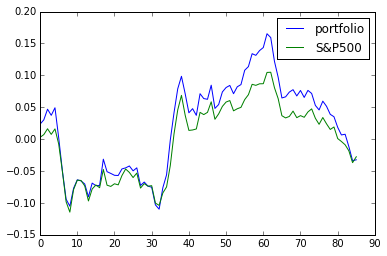

In [10]:
#To Test the portfolio return using recent data, you can find that when the market is going up, this portfolio can obviously beat market:

ptf_return = 0
wgt_list = len(upstock_list)*[1/14]
#print(wgt_list)
for i in range(len(upstock_list)):
    name_tag = name_list[upstock_list[i][0]][upstock_list[i][1]]
    ptf_return = ptf_return + wgt_list[i]*return_test_list[upstock_list[i][0]][name_tag]
    #(return_te_test['NOK']+return_te_test['AAPL']+return_te_test['TXN']+return_ba_test['VMC']+return_ba_test['DOW']+return_noncyc_test['CELG']+return_comm_test['PCLN']+return_comm_test['BIDU']+return_comm_test['BT']+return_fin_test['BAC']+return_fin_test['PUK'])
x = range(len(ptf_return))
#print(len(x))
#print(len(ptf_return))
#print(len(return_nas_test))
pplot.plot(x,ptf_return,label = "portfolio")
pplot.plot(x,return_sp_test,label = "S&P500")
pplot.legend()


array_ptf = np.array(ptf_return)
array_sp = np.array(return_sp_test['^GSPC'])
return_count = 0
for day in range(len(return_sp_test)):
    if array_ptf[day] - array_sp[day] > 0:
        return_count += 1

print(return_count/len(array_sp))

In [11]:
# when it goes down:

downstock_list = list()
for i in range(9):
    temp_beta = list()
    temp_alpha = list()
    score_list = list()
    select_list = list()
    neg_list = list()
    for j in range(16):
        if beta_list[i][j] < 0.7 and beta_list[i][j] > 0 and mean_alpha_list[i][j] > 0:  
            temp_beta.append(beta_list[i][j])
            temp_alpha.append(mean_alpha_list[i][j])
            score = mean_alpha_list[i][j]*1000*0.7 - beta_list[i][j]*10*0.3
            score_list.append(score)
            select_list.append([i,j]) 
        elif beta_list[i][j] < 0:
            neg_list.append([i,j])
    #print(neg_list)
    #print(temp_beta)
    #print(select_list)
    if len(score_list) > 3:
        select_down = list()
        position_list = list()
        for k in range(3):
            select_down.append(np.max(score_list))
            position = score_list.index(max(score_list))
            position_list.append(position)
            score_list[position]=0
        for m in range(3):
            final_select = select_list[position_list[m]]  
            print(name_list[final_select[0]][final_select[1]],"in",name_complete[final_select[0]])
            name_index = name_list[final_select[0]][final_select[1]]
            position_index = name_list[final_select[0]].index(name_index)
            #print(position_index)
            downstock_list.append([final_select[0],position_index])
    else:
        for n in range(len(select_list)):
            final_select = select_list[n]
            print(name_list[final_select[0]][final_select[1]],"in",name_complete[final_select[0]])
            name_index = name_list[final_select[0]][final_select[1]]
            position_index = name_list[final_select[0]].index(name_index)
            #print(position_index)
            downstock_list.append([final_select[0],position_index])
#Besides, when the market is going down, we should find out stocks with negative beta to add them to the final list
downstock_list.extend(neg_list)#Using extend to eliminate the "[]"
#print(downstock_list)

ECL in Basic Materials
VOD in Communication
MA in Nonperiodic Consumption
AMGN in Nonperiodic Consumption
BMY in Nonperiodic Consumption
TJX in Periodic Consumption
NEE in Utilities
SRE in Utilities


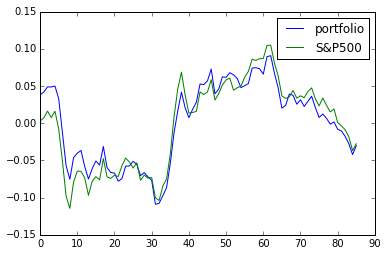

In [12]:
#To Test the portfolio return using recent data, you can find that when the market is going down, this portfolio can obviously beat market:


ptf_return = 0
wgt_list = len(downstock_list)*[1/8]
#print(wgt_list)
for i in range(len(downstock_list)):
    name_tag = name_list[downstock_list[i][0]][downstock_list[i][1]]
    ptf_return = ptf_return + wgt_list[i]*return_test_list[downstock_list[i][0]][name_tag]
    #(return_te_test['NOK']+return_te_test['AAPL']+return_te_test['TXN']+return_ba_test['VMC']+return_ba_test['DOW']+return_noncyc_test['CELG']+return_comm_test['PCLN']+return_comm_test['BIDU']+return_comm_test['BT']+return_fin_test['BAC']+return_fin_test['PUK'])
x = range(len(ptf_return))
#print(len(x))
#print(len(ptf_return))
#print(len(return_nas_test))
pplot.plot(x,ptf_return,label = "portfolio")
pplot.plot(x,return_sp_test,label = "S&P500")
pplot.legend()


array_ptf = np.array(ptf_return)
array_sp = np.array(return_sp_test['^GSPC'])
return_count = 0
for day in range(len(return_sp_test)):
    if array_ptf[day] - array_sp[day] > 0:
        return_count += 1

#print(return_count/len(array_sp))